In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,5)

In [2]:
data=pd.read_csv(r'C:\Users\ASUS\OneDrive\Model\Code\dataset\healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EXPLORATORY DATA ANALYSIS

In [4]:
data.shape

(5110, 12)

In [5]:
data.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [7]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [8]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
# data['bmi'].fillna(data['bmi'].mean(),inplace=True)

from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])


In [10]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data.drop('id',axis=1,inplace=True)

In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier Removation

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

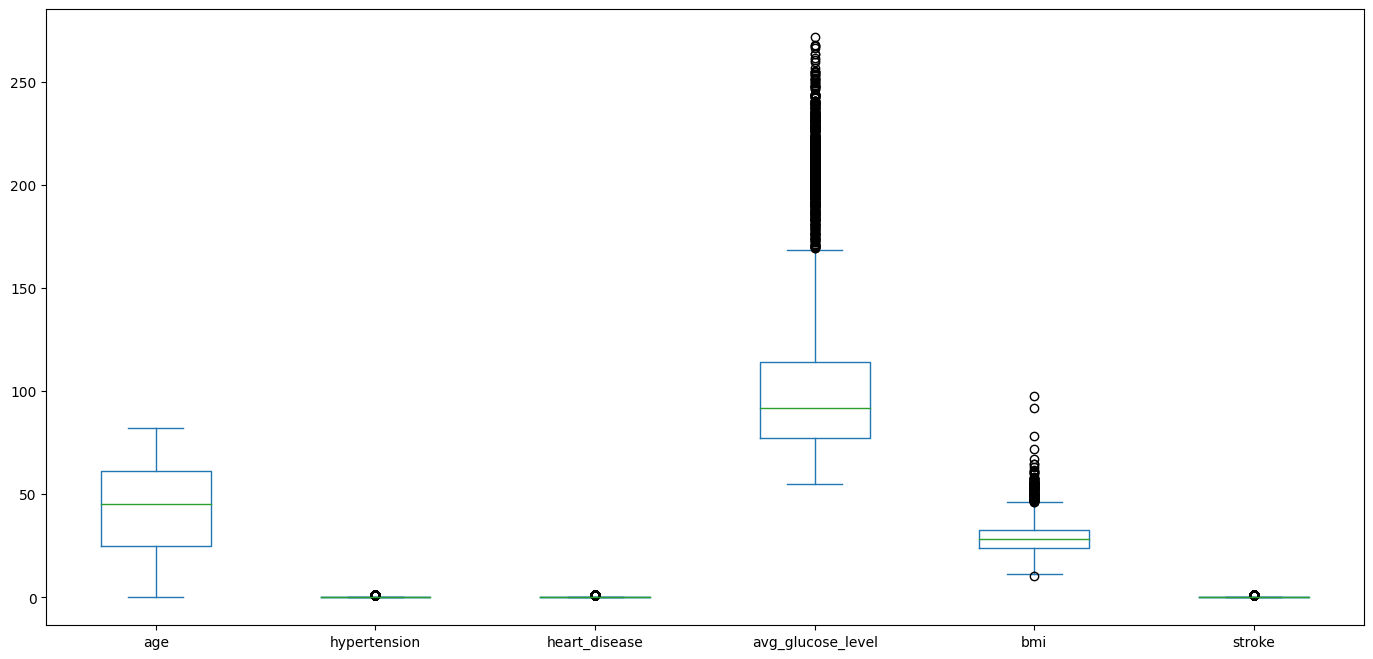

In [15]:
data.plot(kind='box', figsize=(17, 8))
plt.show()

# Label Encoding

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [18]:
gender=enc.fit_transform(data['gender'])

In [19]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [20]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [21]:
data['work_type']=work_type

In [22]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [23]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Splitting the data for train and test

X ---train_X,test_X 80/20

Y ---train_Y,test_Y

In [25]:
X=data.drop('stroke',axis=1)

In [26]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [27]:
Y=data['stroke']

In [28]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [30]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [31]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [32]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [33]:
Y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [34]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [35]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [36]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# Lets save the scaler obect

In [37]:
import pickle
import os


In [38]:
scaler_path=os.path.join('C:/Users/ASUS/OneDrive/Model/Code','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [39]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

# Training

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [41]:
dt.fit(X_train_std,Y_train)


DecisionTreeClassifier()

In [42]:
dt.feature_importances_

array([0.03413546, 0.1587629 , 0.01631338, 0.03128287, 0.02544746,
       0.07203062, 0.03258067, 0.30095264, 0.27004867, 0.05844533])

In [43]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [44]:
Y_pred_dt=dt.predict(X_test_std)

In [45]:
Y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
ac_dt=accuracy_score(Y_test,Y_pred_dt)
pc_dt=precision_score(Y_test, Y_pred_dt, average='weighted')
rec_dt=recall_score(Y_test, Y_pred_dt, average='weighted')
f1_dt=f1_score(Y_test, Y_pred_dt, average='weighted')

print(f"Accuracy: {ac_dt}")
print(f"Precision: {pc_dt}")
print(f"Recall: {rec_dt}")
print(f"F1-score: {f1_dt}")

Accuracy: 0.9050880626223092
Precision: 0.8912727011323497
Recall: 0.9050880626223092
F1-score: 0.8979648246161912


In [48]:
import joblib
model_path=os.path.join('C:/Users/ASUS/OneDrive/Model/Code','models/dt.sav')
joblib.dump(dt,model_path)

['C:/Users/ASUS/OneDrive/Model/Code\\models/dt.sav']

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [50]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [51]:
Y_pred_lr=lr.predict(X_test_std)

In [52]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)
pc_lr=precision_score(Y_test, Y_pred_lr, average='weighted')
rec_lr=recall_score(Y_test, Y_pred_lr, average='weighted')
f1_lr=f1_score(Y_test, Y_pred_lr, average='weighted')

print(f"Accuracy: {ac_lr}")
print(f"Precision: {pc_lr}")
print(f"Recall: {rec_lr}")
print(f"F1-score: {f1_lr}")

Accuracy: 0.9383561643835616
Precision: 0.8822937490775897
Recall: 0.9383561643835616
F1-score: 0.9094618049552946


# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [55]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [56]:
Y_pred_knn=knn.predict(X_test_std)

In [57]:
ac_knn=accuracy_score(Y_test,Y_pred_knn)
pc_knn=precision_score(Y_test, Y_pred_knn, average='weighted')
rec_knn=recall_score(Y_test, Y_pred_knn, average='weighted')
f1_knn=f1_score(Y_test, Y_pred_knn, average='weighted')

print(f"Accuracy: {ac_knn}")
print(f"Precision: {pc_knn}")
print(f"Recall: {rec_knn}")
print(f"F1-score: {f1_knn}")


Accuracy: 0.9344422700587084
Precision: 0.8820693994654474
Recall: 0.9344422700587084
F1-score: 0.9075008389037532


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [59]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [60]:
Y_pred_rf=rf.predict(X_test_std)

In [61]:
ac_rf=accuracy_score(Y_test,Y_pred_rf)
pc_rf=precision_score(Y_test, Y_pred_rf, average='weighted')
rec_rf=recall_score(Y_test, Y_pred_rf, average='weighted')
f1_rf=f1_score(Y_test, Y_pred_rf, average='weighted')

print(f"Accuracy: {ac_rf}")
print(f"Precision: {pc_rf}")
print(f"Recall: {rec_rf}")
print(f"F1-score: {f1_rf}")

Accuracy: 0.9373776908023483
Precision: 0.8822378266375043
Recall: 0.9373776908023483
F1-score: 0.9089723062325803


In [62]:
import joblib
model_path=os.path.join('C:/Users/ASUS/OneDrive/Model/Code','models/rf.sav')
joblib.dump(dt,model_path)

['C:/Users/ASUS/OneDrive/Model/Code\\models/rf.sav']

# Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [64]:
nb.fit(X_train, Y_train)

GaussianNB()

In [65]:
Y_pred_nb=nb.predict(X_test_std)

C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [66]:
ac_nb=accuracy_score(Y_test, Y_pred_nb)
pc_nb=precision_score(Y_test, Y_pred_nb, average='weighted')
rec_nb=recall_score(Y_test, Y_pred_nb, average='weighted')
f1_nb=f1_score(Y_test, Y_pred_nb, average='weighted')

print(f"Accuracy: {ac_nb}")
print(f"Precision: {pc_nb}")
print(f"Recall: {rec_lr}")
print(f"F1-score: {f1_lr}")

Accuracy: 0.8463796477495108
Precision: 0.9012834408630708
Recall: 0.9383561643835616
F1-score: 0.9094618049552946


# SVM

In [67]:
from sklearn.svm import SVC

In [68]:
sv=SVC()

In [69]:
sv.fit(X_train_std,Y_train)

SVC()

In [70]:
Y_pred_sv=sv.predict(X_test_std)

In [71]:
ac_sv=accuracy_score(Y_test, Y_pred_sv)
pc_sv=precision_score(Y_test, Y_pred_sv, average='weighted')
rec_sv=recall_score(Y_test, Y_pred_sv, average='weighted')
f1_sv=f1_score(Y_test, Y_pred_sv, average='weighted')

print(f"Accuracy: {ac_sv}")
print(f"Precision: {pc_sv}")
print(f"Recall: {rec_sv}")
print(f"F1-score: {f1_sv}")

Accuracy: 0.9393346379647749
Precision: 0.8823495620804148
Recall: 0.9393346379647749
F1-score: 0.9099508097337881


C:\Python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
import joblib
model_path=os.path.join('C:/Users/ASUS/OneDrive/Model/Code','models/svm.sav')
joblib.dump(sv,model_path)

['C:/Users/ASUS/OneDrive/Model/Code\\models/svm.sav']

# XGBOOST

In [72]:
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

In [73]:
# xb = xgb.XGBRegressor()
xb = BaggingRegressor(base_estimator=xgb.XGBRegressor())

In [74]:
xb.fit(X_train, Y_train)

C:\Python 3.9\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...))

In [75]:
Y_pred_xb=xb.predict(X_test_std)

C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


In [76]:
Y_pred_xb

array([-0.00415069, -0.00402328, -0.00333366, ..., -0.00714586,
       -0.00402328, -0.00375952], dtype=float32)

In [77]:
predictions = [round(value) for value in Y_pred_xb]
# evaluate predictions
ac_xb = accuracy_score(Y_test, predictions)

# ac_xb=accuracy_score(Y_test, Y_pred_xb)
pc_xb=precision_score(Y_test, predictions, average='weighted')
rec_xb=recall_score(Y_test, predictions, average='weighted')
f1_xb=f1_score(Y_test, predictions, average='weighted')

print(f"Accuracy: {ac_xb}")

print(f"Precision: {pc_xb}")
print(f"Recall: {rec_xb}")
print(f"F1-score: {f1_xb}")


Accuracy: 0.9393346379647749
Precision: 0.8823495620804148
Recall: 0.9393346379647749
F1-score: 0.9099508097337881


C:\Python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Average Model

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
final_model_pred = (ac_lr+ac_rf+ac_dt+ac_knn+ac_nb)/5.0

In [80]:
final_model_pred

0.9123287671232877

# Stacking

In [81]:
from vecstack import stacking

In [82]:
all_models = [lr, dt, rf, knn, nb]

In [83]:
# s_train, s_test = stacking(all_models, X_train, X_test, Y_train, regression=True, n_folds=4)

# Max Voting

In [84]:
# importing voting classifier

from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [105]:
final_model = VotingClassifier( estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('knn', knn), ('nb', nb), ('svm',sv),('xgb',xb)], voting='hard')

In [106]:
xb = XGBClassifier(probability=True)

In [107]:
final_model.fit(X_train, Y_train)

C:\Python 3.9\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python 3.9\lib\site-packages\xgboost\core.py:160: UserWarning: [20:22:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "probability" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB()), ('svm', SVC()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_round...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            probability=True, ...))])

In [108]:
final_model.predict(X_test_std)

C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with featur

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
pred_final = final_model.predict(X_test_std)

C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Python 3.9\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with featur

In [110]:
ac_final = accuracy_score(Y_test, pred_final)
pc_final=precision_score(Y_test, pred_final, average='weighted')
rec_final=recall_score(Y_test, pred_final, average='weighted')
f1_final=f1_score(Y_test, pred_final, average='weighted')

print(f"Accuracy: {ac_final}")
print(f"Precision: {pc_final}")
print(f"Recall: {rec_final}")
print(f"F1-score: {f1_final}")

Accuracy: 0.9393346379647749
Precision: 0.8823495620804148
Recall: 0.9393346379647749
F1-score: 0.9099508097337881


C:\Python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
import joblib
model_path=os.path.join('C:/Users/ASUS/OneDrive/Model/Code','models/finalized_model.sav')
joblib.dump(final_model,model_path)

['C:/Users/ASUS/OneDrive/Model/Code\\models/finalized_model.sav']

In [112]:
color = ['#929591', '0.8', '#808080', 'black','#929591','0.8', '#808080', '#000000']

# Accuracy Graph

(0.0, 2.0)

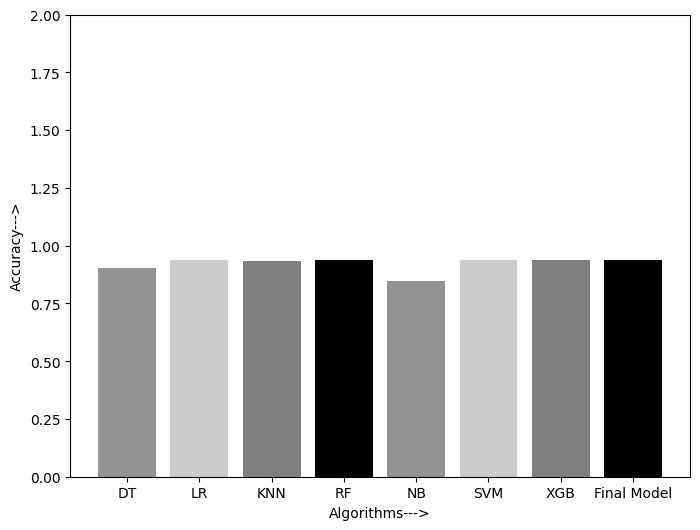

In [113]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6))

plt.bar(['DT','LR','KNN','RF','NB','SVM','XGB','Final Model'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_nb,ac_sv, ac_xb, ac_final], color=color)
plt.xlabel("Algorithms--->")
plt.ylabel("Accuracy--->")
plt.ylim(top=2)



# Precision Graph

(0.0, 2.0)

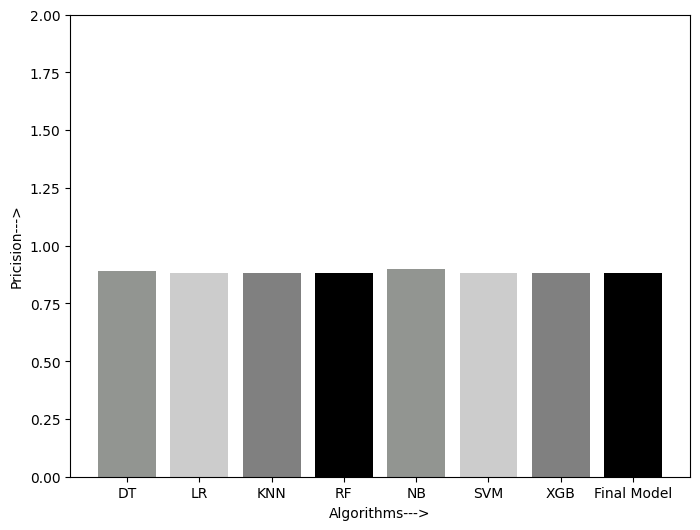

In [114]:
figure(num=None, figsize=(8, 6))
plt.bar(['DT','LR','KNN','RF','NB','SVM', 'XGB','Final Model'],[pc_dt,pc_lr,pc_knn,pc_rf,pc_nb,pc_sv, pc_xb, pc_final], color=color)
plt.xlabel("Algorithms--->")
plt.ylabel("Pricision--->")
plt.ylim(top=2)

# Recall Score Graph

(0.0, 2.0)

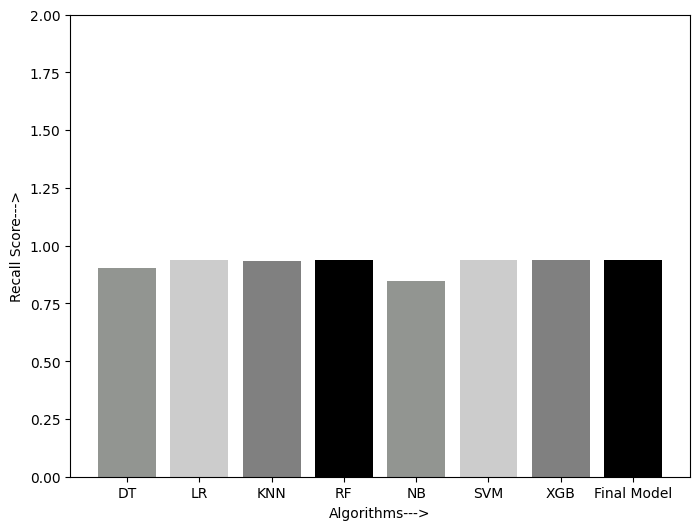

In [115]:
figure(num=None, figsize=(8, 6))
plt.bar(['DT','LR','KNN','RF','NB','SVM', 'XGB','Final Model'],[rec_dt,rec_lr,rec_knn,rec_rf,rec_nb,rec_sv, rec_xb, rec_final], color=color)
plt.xlabel("Algorithms--->")
plt.ylabel("Recall Score--->")
# plt.show()
plt.ylim(top=2)

# F1-Score Graph

(0.0, 2.0)

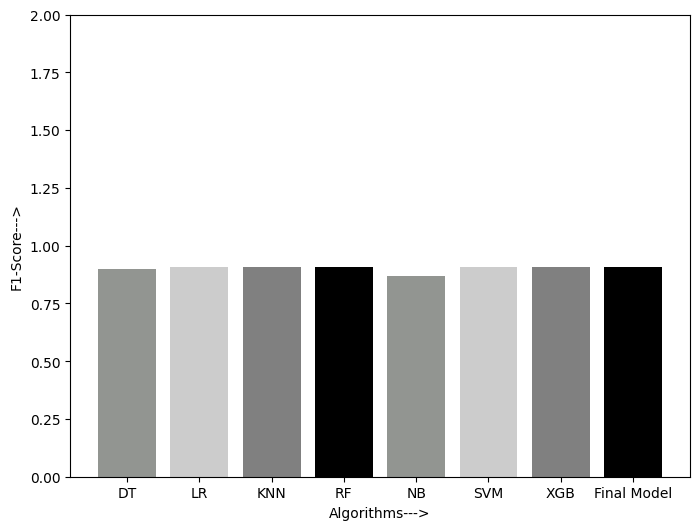

In [116]:
figure(num=None, figsize=(8, 6))
plt.bar(['DT','LR','KNN','RF','NB','SVM', 'XGB','Final Model'],[f1_dt,f1_lr,f1_knn,f1_rf,f1_nb,f1_sv,f1_xb,f1_final], color=color)
plt.xlabel("Algorithms--->")
plt.ylabel("F1-Score--->")
# plt.show()
plt.ylim(top=2)